In [5]:
import os,sys, math, ROOT
from array import array
import numpy as np
from collections import OrderedDict

#Importing a helper file where some functions are defined
from helper import *
from helper_advanced import *

debug=False
doIDs=False
doPTs=12
do4Lep=True
weight = 1

selections = OrderedDict([
    ('nocuts', None),
    ('4Lep', 4),
    ("Cat", None),
    ("matching", None),
    ("NoJPsi", None),
    ("RealZ", 10),
    ])

hists = {}

In [6]:
def recreatehistograms():
    for key in list(hists.keys()):
        del hists[key]
    # hists['cutflow'] = ROOT.TH1F("cutflow",";cutflow;Events", len(selections), -0.5, len(selections)-0.5)
    for ind,sel in enumerate(selections.keys()):
        # hists[str(ind)+'_'+sel+'_nEvents'] = ROOT.TH1F(sel+"nEvents", ";Counting experiment;Events", 1, -0.5, 1.5)
        # hists[str(ind)+'_'+sel+'_npv'] = ROOT.TH1F(sel+"hist_NPV", ";Number of reconstructed vertices;Events", 100, 0, 100)
        # hists['dR_Lep'] = ROOT.TH1F("dR_LEP",";#Delta R(lep_i,lep_j);Events", 100, 0, 5)
        # for lep in ['Muo','Ele','Lep']:
        #     hists[str(ind)+'_'+sel+'_n'+lep] = ROOT.TH1F(sel+"n"+lep,";n"+lep+";Events", 11, -0.5, 10.5)
        #     hists[str(ind)+'_'+sel+'_pt'+lep] = ROOT.TH1F(sel+"pt"+lep,";p_{T}^{"+lep+"};Events", 50, 0, 200)
        #     hists[str(ind)+'_'+sel+'_eta'+lep] = ROOT.TH1F(sel+"_eta"+lep,";#eta^{"+lep+"};Events", 60, -3.0, 3.0)
        #     hists[str(ind)+'_'+sel+'_phi'+lep] = ROOT.TH1F(sel+"_phi"+lep,";#phi^{"+lep+"};Events", 70, -3.5, 3.5)
        #     hists[str(ind)+'_'+sel+'_id'+lep] = ROOT.TH1F(sel+"_id"+lep,";passID;Events", 2, -0.5, 1.5)
        #     hists[str(ind)+'_'+sel+'_dR'+lep] = ROOT.TH1F(sel+"dR"+lep,";#Delta R("+lep+",lep_j);Events", 100, 0, 5)
        # if ind<4: continue
        hists[str(ind)+'_'+sel+'_massH'] = ROOT.TH1F(sel+"hist_massH",";Four Lepton Invariant Mass;Events", 500, 0, 500)
        # hists[str(ind)+'_'+sel+'_massZ1'] = ROOT.TH1F(sel+"_massZ1",";M(Z1);Events", 500, 0, 500)
        # hists[str(ind)+'_'+sel+'_massZ2'] = ROOT.TH1F(sel+"_massZ2",";M(Z2);Events", 500, 0, 500)
        # hists[str(ind)+'_'+sel+'_massJpsi'] = ROOT.TH1F(sel+"_massjpsi",";M(ll);Events", 200, 0, 10)
        # hists[str(ind)+'_'+sel+'_massZ1_vs_Z2'] = ROOT.TH2F(sel+"_massZ1_vs_Z2",";M(Z1);M(Z2);Events", 250, 0, 500, 250, 0, 500)
        # hists[str(ind)+'_'+sel+'_dRZ1'] = ROOT.TH1F(sel+"_dRZ1",";#Delta R(lep_1,lep_2)^{Z_1};Events", 100, 0, 5)
        # hists[str(ind)+'_'+sel+'_dRZ2'] = ROOT.TH1F(sel+"_dRZ2",";#Delta R(lep_1,lep_2)^{Z_2};Events", 100, 0, 5)
        # hists[str(ind)+'_'+sel+'_dRZ1Z2'] = ROOT.TH1F(sel+"_dRZ1Z2",";#Delta R(Z_1,Z_2);Events", 100, 0, 5)

def fillhist(events,selections, sel):
    global weight
    print(len(events))
    index = list(selections.keys()).index(sel)
    hname = str(index)+'_'+sel
    # hists['cutflow'].SetBinContent(index+1,len(events))
    for ev in events:
        # hists[hname+'_nEvents'].Fill(1,weight)
        # hists[hname+'_npv'].Fill(ev['npv'],weight)
        # for flav in ['Muo','Ele','Lep']:
        #     nLep = ev["n"+flav]
        #     hists[hname+'_n'+flav].Fill(nLep,weight)
        # for ind in range(0,10):
        #     if not "lep"+str(ind) in ev: continue
        #     lep = ev["lep"+str(ind)]
        #     flavor = ev["lep"+str(ind)+"flavor"]
        #     for flav in ['Muo','Ele','Lep']:
        #         if flav=='Muo' and abs(flavor)!=13: continue
        #         if flav=='Ele' and abs(flavor)!=11: continue
        #         hists[hname+'_pt'+flav].Fill(lep.Pt(),weight)
        #         hists[hname+'_eta'+flav].Fill(lep.Eta(),weight)
        #         hists[hname+'_phi'+flav].Fill(lep.Phi(),weight)
        #         hists[hname+'_id'+flav].Fill(ev["lep"+str(ind)+"passID"],weight)
        # if index<4: continue
        hists[hname+'_massH'].Fill(ev['H'].M(),weight)
        # hists[hname+'_massZ1'].Fill(ev['Z1'].M(),weight)
        # hists[hname+'_massZ2'].Fill(ev['Z2'].M(),weight)
        # hists[hname+'_massJpsi'].Fill(ev['Z1'].M(),weight)
        # hists[hname+'_massJpsi'].Fill(ev['Z2'].M(),weight)
        # hists[hname+'_massZ1_vs_Z2'].Fill(ev['Z1'].M(),ev['Z2'].M(),weight)
        # hists[hname+'_dRZ1Z2'].Fill(ev['Z1'].DeltaR(ev['Z2']),weight)
        # if 'allPairs' in ev:
        #     indices = ev["allPairs"][0].copy()
        #     hists[hname+'_dRZ1'].Fill(ev["lep"+indices[0]].DeltaR(ev["lep"+indices[1]]),weight)
        #     hists[hname+'_dRZ2'].Fill(ev["lep"+indices[2]].DeltaR(ev["lep"+indices[3]]),weight)

In [7]:
os.system('mkdir -p pdfs')
recreatehistograms()
# inputfile = ROOT.TFile("events4leptonsCMS_FullRun2.root","READ")
# tree = inputfile.Get("tree")
# inputfile = ROOT.TFile("MC_signal.root","READ")
inputfile = ROOT.TFile("data.root","READ")
tree = inputfile.Get("ntuplizer/tree")
outputfile = ROOT.TFile("output.root","RECREATE")
    
if 'MC' in inputfile.GetName():
    br = 0.026*0.1*0.1
    weight = 55.*br*137./3706044 #(xsec*BR*Lumi/NGen)
        
nentries = tree.GetEntries()
# nentries = 10000
if 'MC' in inputfile.GetName():
    weight *= 1.*tree.GetEntries()/nentries
print("Number of entries: ", nentries)
ntot = 0
n4muo = 0
n4ele = 0
n2m2e = 0

Number of entries:  104317


In [8]:
events = []
for i in range(0, nentries):
    #Load entry number i
    tree.GetEntry(i)
    event = {}
    event["npv"] = tree._n_PV
    event["event"] = tree._eventNb
    event["nMuo"] = 0
    event["nEle"] = 0
    event["nLep"] = 0
    event["H"] = ROOT.TLorentzVector()
    event["Z1"] = ROOT.TLorentzVector()
    event["Z2"] = ROOT.TLorentzVector()
    for ind in range(0,len(tree._lPt)):
        lep = ROOT.TLorentzVector()
        lep.SetPtEtaPhiM(tree._lPt[ind],tree._lEta[ind],tree._lPhi[ind],0)
        event["lep"+str(ind)] = lep
        event["lep"+str(ind)+"flavor"] = tree._lpdgId[ind]
        event["lep"+str(ind)+"passID"] = tree._lPassTightID[ind]
        event["nLep"] += 1
        if (abs(event["lep"+str(ind)+"flavor"])==11): event["nEle"] += 1
        if (abs(event["lep"+str(ind)+"flavor"])==13): event["nMuo"] += 1
    if 'lep0' in event and 'lep1' in event:
        event["Z1"] = event["lep0"]+event["lep1"]
        if 'lep2' in event and 'lep3' in event:
            event["H"] = event["lep0"]+event["lep1"]+event["lep2"]+event["lep3"]
            event["Z2"] = event["lep2"]+event["lep3"]
    # print(event["nMuo"],event["nEle"],event["nLep"])
    # if (tree._eventNb==602182346):
    #     print(event)
    #     print([(event["lep"+str(i)].M(), event["lep"+str(i)].Pt()) for i in range(0,4)] )
    #     for ind in range(0,len(tree._lPt)):
    #         print(tree._lPt[ind],tree._lEta[ind],tree._lPhi[ind])
    # else: continue
    events.append(event)

fillhist(events, selections, "nocuts")

104317


In [9]:
category = "4Lep"
# category = "4Muo"
# category = "4Ele"
# category = "2M2E"

for ev in events.copy():
    if do4Lep and ev['nLep']<selections["4Lep"]: events.remove(ev)
fillhist(events, selections, "4Lep")
for ev in events.copy():
    if category=="4Muo" and ev['nMuo']<4: events.remove(ev)
    if category=="4Ele" and ev['nEle']<4: events.remove(ev)
    if category=="2M2E" and ev['nMuo']<2 and ev['nEle']<2: events.remove(ev)
fillhist(events, selections, "Cat")

104317
104317


In [10]:
eff_Z_ref = 0
eff_H_ref = 0
eff_OS_ref = 0
for ev in events:
    if ev["H"].M()>80  and ev["H"].M()<100: eff_Z_ref+=weight
    if ev["H"].M()>120 and ev["H"].M()<130: eff_H_ref+=weight
    if ev["H"].M()>200 and ev["H"].M()<501: eff_OS_ref+=weight
# print ("Ref Eff", category, eff_Z_ref, eff_H_ref, eff_OS_ref)

def PassLepton(ev,ind):
    pass_ = True
    lep_pt = ev["lep"+str(ind)].Pt()
    lep_fl = event["lep"+str(ind)+"flavor"]
    lep_id = event["lep"+str(ind)+"passID"]
    # if doIDs and abs(lep_fl)==13 and not lep_id: pass_=False
    # if doPTs>0 and abs(lep_fl)==11 and lep_pt<doPTs: pass_=False
    # if doPTs>0 and lep_pt<doPTs: pass_=False
    return pass_

In [11]:
for ev in events:
    ev["allPairs"] = []
    for i in range(0,10):
        if not "lep"+str(i) in ev: continue
        # if not PassLepton(ev,i): continue
        for j in range(0,10):
            if j<=i: continue
            if not "lep"+str(j) in ev: continue
            # if not PassLepton(ev,j): continue
            if not SameFlavOppCharge(ev,i,j):continue
            for k in range(0,10):
                if not "lep"+str(k) in ev: continue
                # if not PassLepton(ev,k): continue
                if k==i or k==j: continue
                for l in range(0,10):
                    if l==i or l==j or l<=k: continue
                    if not "lep"+str(l) in ev: continue
                    # if not PassLepton(ev,l): continue
                    if not SameFlavOppCharge(ev,k,l):continue
                    if any([str(i),str(j),str(k),str(l)]==x or [str(k),str(l),str(i),str(j)]== x for x in ev["allPairs"]): continue
                    if category=="2M2E" and abs(ev["lep"+str(i)+"flavor"])==abs(ev["lep"+str(k)+"flavor"]): continue
                    lep_pts = list(reversed(sorted([ev["lep"+str(ind)].Pt() for ind in [i,j,k,l]])))
                    lep_flav = [ev["lep"+str(ind)+"flavor"] for ind in [i,j,k,l]]
                    if lep_pts[0]<15: continue
                    if lep_pts[1]<15: continue
                    if lep_pts[2]<12: continue
                    if lep_pts[3]<12: continue
                    ev["allPairs"].append([str(i),str(j),str(k),str(l)])


In [12]:
for ev in events.copy():
    if len(ev["allPairs"])==0: events.remove(ev)

fillhist(events, selections, "matching")

10040


In [15]:
for ev in events.copy():
    for pair in ev["allPairs"].copy():
        ev["Z1"] = ev["lep"+str(pair[0])]+ev["lep"+str(pair[1])]
        ev["Z2"] = ev["lep"+str(pair[2])]+ev["lep"+str(pair[3])]
        if ev["Z1"].M()<4 or ev["Z2"].M()<4 or ev['Z1'].DeltaR(ev['Z2'])<0.4: ev["allPairs"].remove(pair)
    if len(ev["allPairs"])==0: events.remove(ev)

for ev in events:
    indices = ev["allPairs"][0].copy()
    ev["H"] = ev["lep"+indices[0]]+ev["lep"+indices[1]]+ev["lep"+indices[2]]+ev["lep"+indices[3]]
    ev["Z1"] = ev["lep"+indices[0]]+ev["lep"+indices[1]]
    ev["Z2"] = ev["lep"+indices[2]]+ev["lep"+indices[3]]
    if ev["Z1"].M() < ev["Z2"].M():
        ev["Z2"] = ev["lep"+indices[0]]+ev["lep"+indices[1]]
        ev["Z1"] = ev["lep"+indices[2]]+ev["lep"+indices[3]]
        ev["allPairs"][0] = [indices[2],indices[3],indices[0],indices[1]]
fillhist(events, selections, "NoJPsi")

7939


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


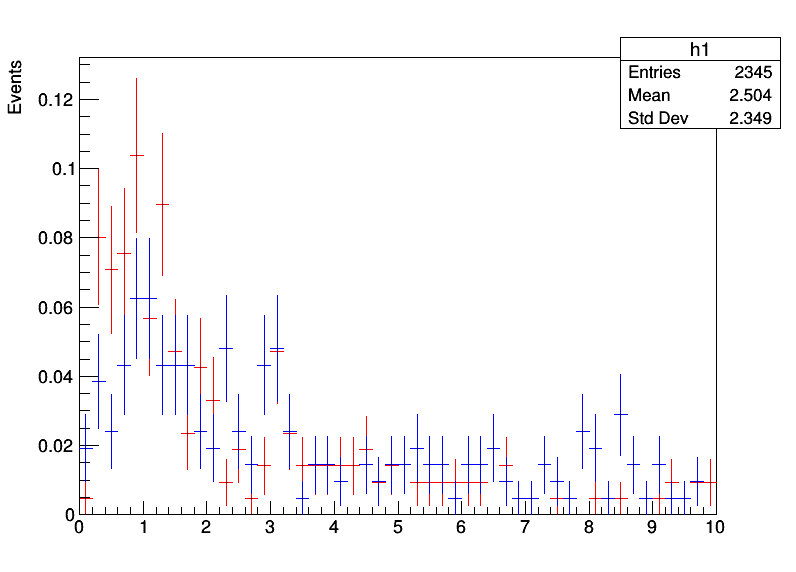

In [49]:
hist.Delete()
h1.Delete()
h2.Delete()
c.Close()
hist = ROOT.TH1F("hist_massH",";Four Lepton Invariant Mass;Events", 500, 0, 500)
h1 = ROOT.TH1F("h1",";;Events", 50, 0, 10)
h2 = ROOT.TH1F("h1",";;Events", 50, 0, 10)
for ev in events:
    # hist.Fill(ev['H'].M(),weight)
    sel = ev['H'].M()>130 and ev['H'].M()<200
    pair = ev['allPairs'][0]
    var = (ev['lep'+pair[0]]+ev['lep'+pair[2]]).M()
    if sel: h1.Fill(var,weight)
    else:   h2.Fill(var,weight)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
# hist.Draw()
h1.Scale(1./h1.Integral())
h2.Scale(1./h2.Integral())
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)
h1.Draw()
h2.Draw("same")
c.Draw()